# Tutorial on Inverse Ising method

GOAL: Given the experimental means $\langle x_i \rangle_{expt}$ and correlations $\langle x_i x_j\rangle_{expt}$, get the parameters of the corresponding Ising model

$P(x) = \frac{1}{Z}e^{-H(x)}$

$H(x) = \sum_i^d h_i x_i + \frac{1}{2}\sum_{i,j} x_i J_{ij} x_j$, with $h_i$ and $J_{ij}$ such that $\langle x_i \rangle_{P} = \langle x_i \rangle_{expt}$ and $\langle x_i x_j\rangle_{P} = \langle x_i x_j\rangle_{expt}$

Since the correlations and interaction matrices are symmetric, what really matters is their upper triangular part

NOTATION:  <br>
- $f_{data}$ is the vector of experimental means and correlations (only the upper diagonal part of the correlation matrix, to avoid redundancy). It has size $d + \frac{(d-1)d}{2}$, where the first $d$ components are the means $\langle x_i \rangle_{expt}$ and the last $\frac{(d-1)d}{2}$ components are the correlations $\langle x_i x_j \rangle_{expt}$, with $i<j$
- $f_{model}$ has the same shape as $f_{data}$ and stores the means and correlations computed using the model (via MonteCarlo simulation for large systems)
- $q$ has the same shape as $f_{data}$ and stores the model parameters $h_i$ and $J_{ij}$, with $i<j$ 

In [1]:
from functions import *
from matplotlib import pyplot as plt
import numpy as np
import os
from pathlib import Path
import tensorflow as tf
from tqdm import trange

%load_ext autoreload
%autoreload 2
plt.rcParams.update({'font.size': 20})

2024-09-17 12:59:17.380759: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


# Step 0: generate $f_{data}$ 
$f_{data}$ is the vector of experimental means and correlations. In real applications, one takes this from experimental data. In this tutorial, we assume data come from an Ising model with parameters $q_{true}$ and use a MonteCarlo simulation to get $f_{data}$ given $q_{true}$.

In [10]:
d = 20 #Number of variables in the system

#_______________ generate f_data ____________________________________________________________________
# In real applications, f_data comes from the experiment.
# Here we generate f_data from an Ising model with parameters q_true

q_true  = np.random.normal(0,1, int(d+ (d-1)*d/2)) #true parameters (for real data we don't have this)

h,J = get_hJ(q_true,d)
h = tf.convert_to_tensor(h,dtype=tf.float64)
J= tf.convert_to_tensor(J,dtype=tf.float64)

# Parameters of the MonteCarlo simulation
n_samples = 10000 
n_thermalize = 20000 #number of montecarlo steps. Note: it grows with d
x = np.random.choice([-1,1], (n_samples,d))
x = tf.convert_to_tensor(x,dtype=tf.float64)

100%|██████████| 20000/20000 [00:28<00:00, 696.67it/s]


Text(0, 0.5, 'energy')

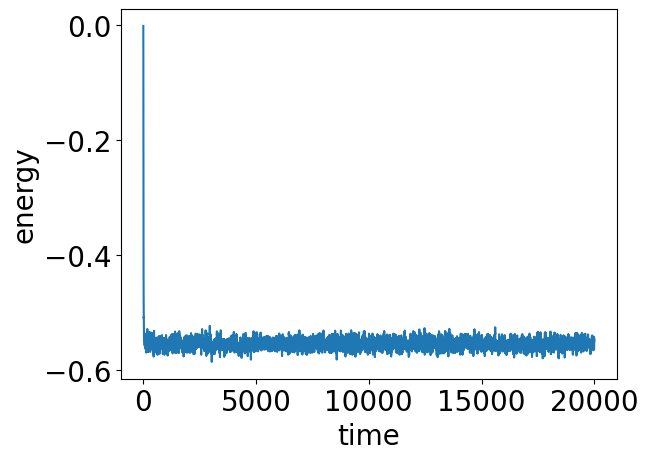

In [12]:
# thermalize
x, energy_history = thermalize(x,J,h, NumSteps=n_thermalize , crange =trange)
plt.plot(energy_history)
plt.xlabel('time')
plt.ylabel('energy')

In [17]:
# compute the means and correlations
x, f_data = compute_f(x,J,h,StepsTherm=10,NumSteps=50, crange=lambda NumSteps, dtype: trange(NumSteps))

100%|██████████| 50/50 [00:01<00:00, 39.94it/s]


In [18]:
# save f_data in the 'folder_bin' folder
folder_bin = ''
label='a'
np.savetxt(f'{folder_bin}f_data_{d}_{label}.dat', f_data)

# Step 1. Find the model paramters q.
Run 'find_ising.py' program to find the parameters {q}.<br> 
It will save a plot "evolution_{d}_{label}.pdf" and a file "q_{d}_{label}.dat"

NOTE: in the figure there will be 6 plots:<br>
a. Temporal evolution of $||f_{data} - f_{model}||^2$ <br>
b. Temporal evolution of one component (the one in the title) of $f_{data}$/$f_{model}$<br>
c. Temporal evolution of one component (the one in the title) of $q$ <br>
d. Plot of $|f_{data} - f_{model}|$<br>
e. Scatter plot of experimental vs model connected correlations $\langle x_i x_j \rangle_{conn} = \langle x_i x_j \rangle - \langle x_i \rangle \langle x_j \rangle  $<br>
f. (Comparison between histogram of experimental and model sums). Empty in this tutorial.

q loaded from file


100%|██████████| 50/50 [00:00<00:00, 56.03it/s]


[4] [563.6]


  0%|          | 0/1000 [00:00<?, ?it/s]

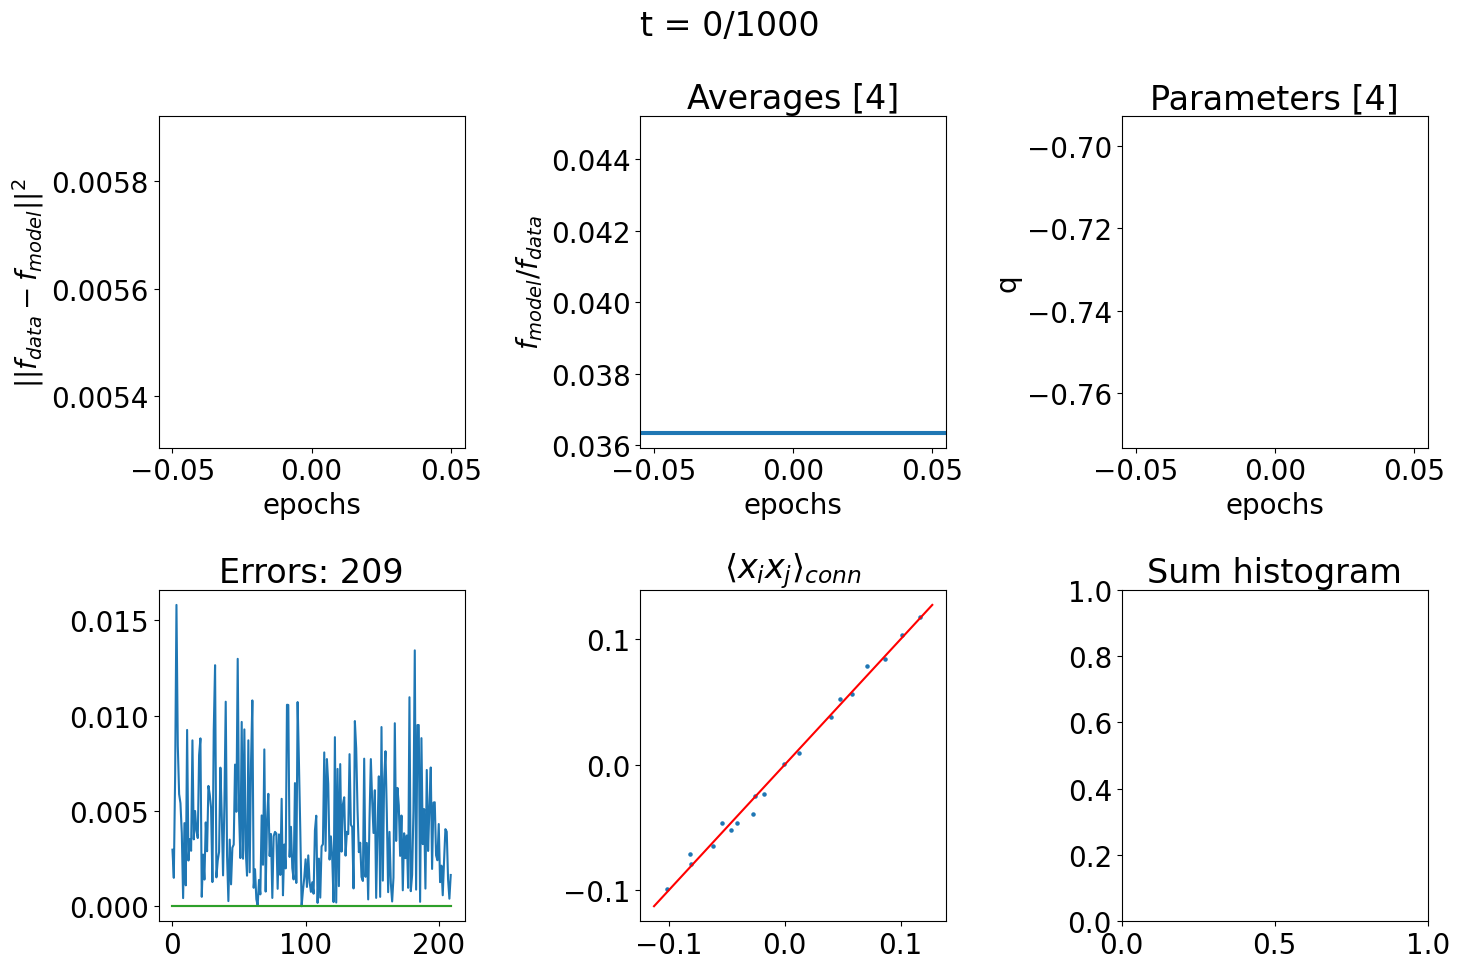

  5%|▌         | 50/1000 [00:14<03:58,  3.98it/s]

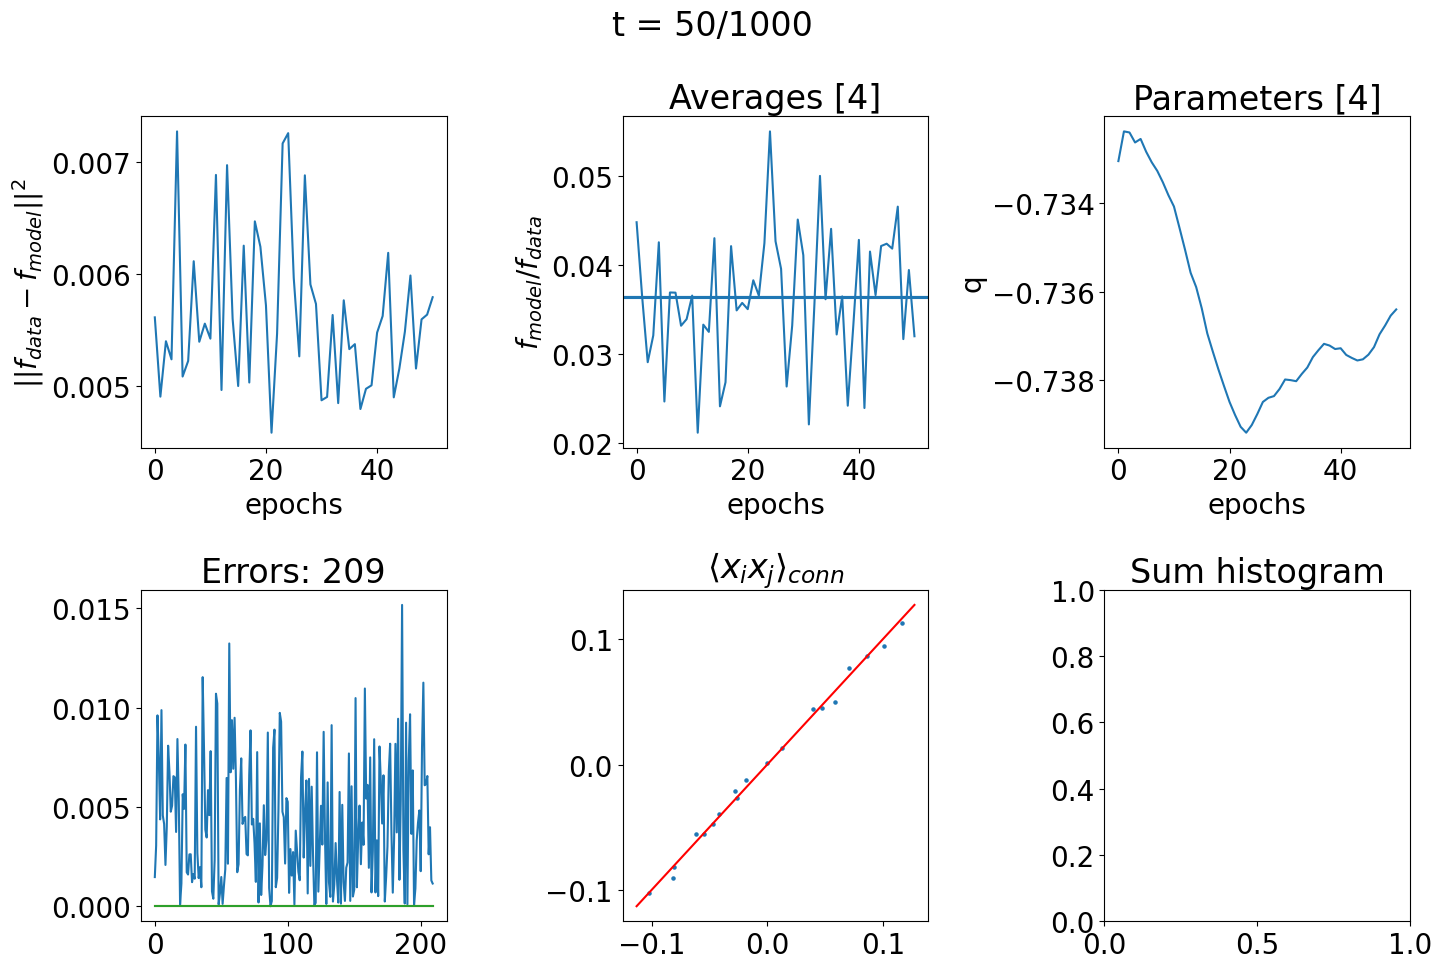

 10%|█         | 100/1000 [00:29<03:52,  3.87it/s]

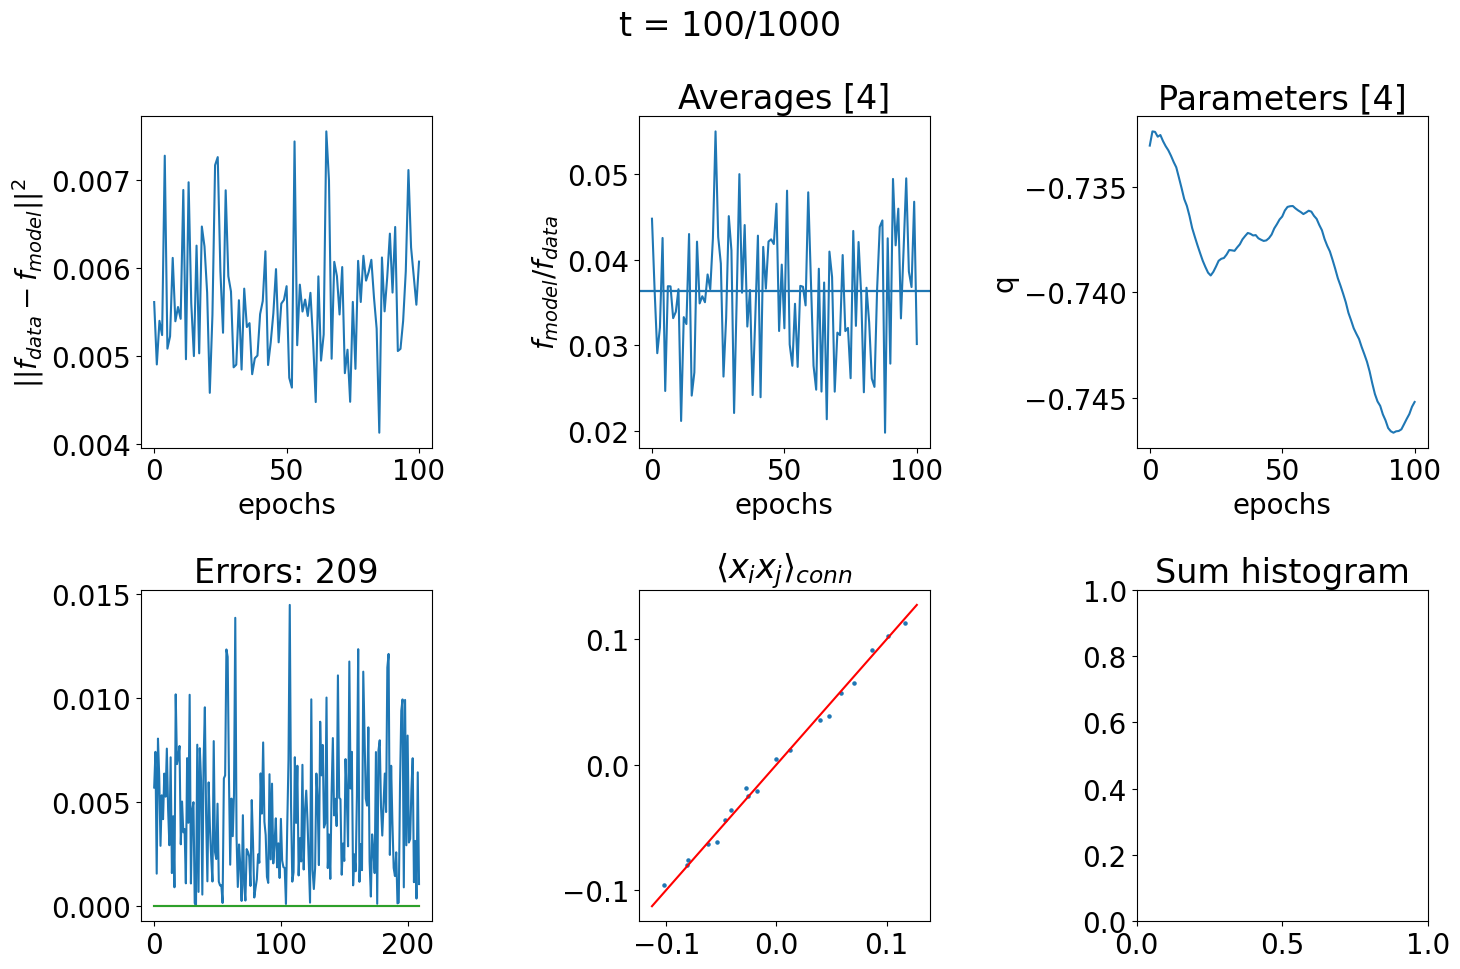

 15%|█▌        | 150/1000 [00:45<03:40,  3.86it/s]

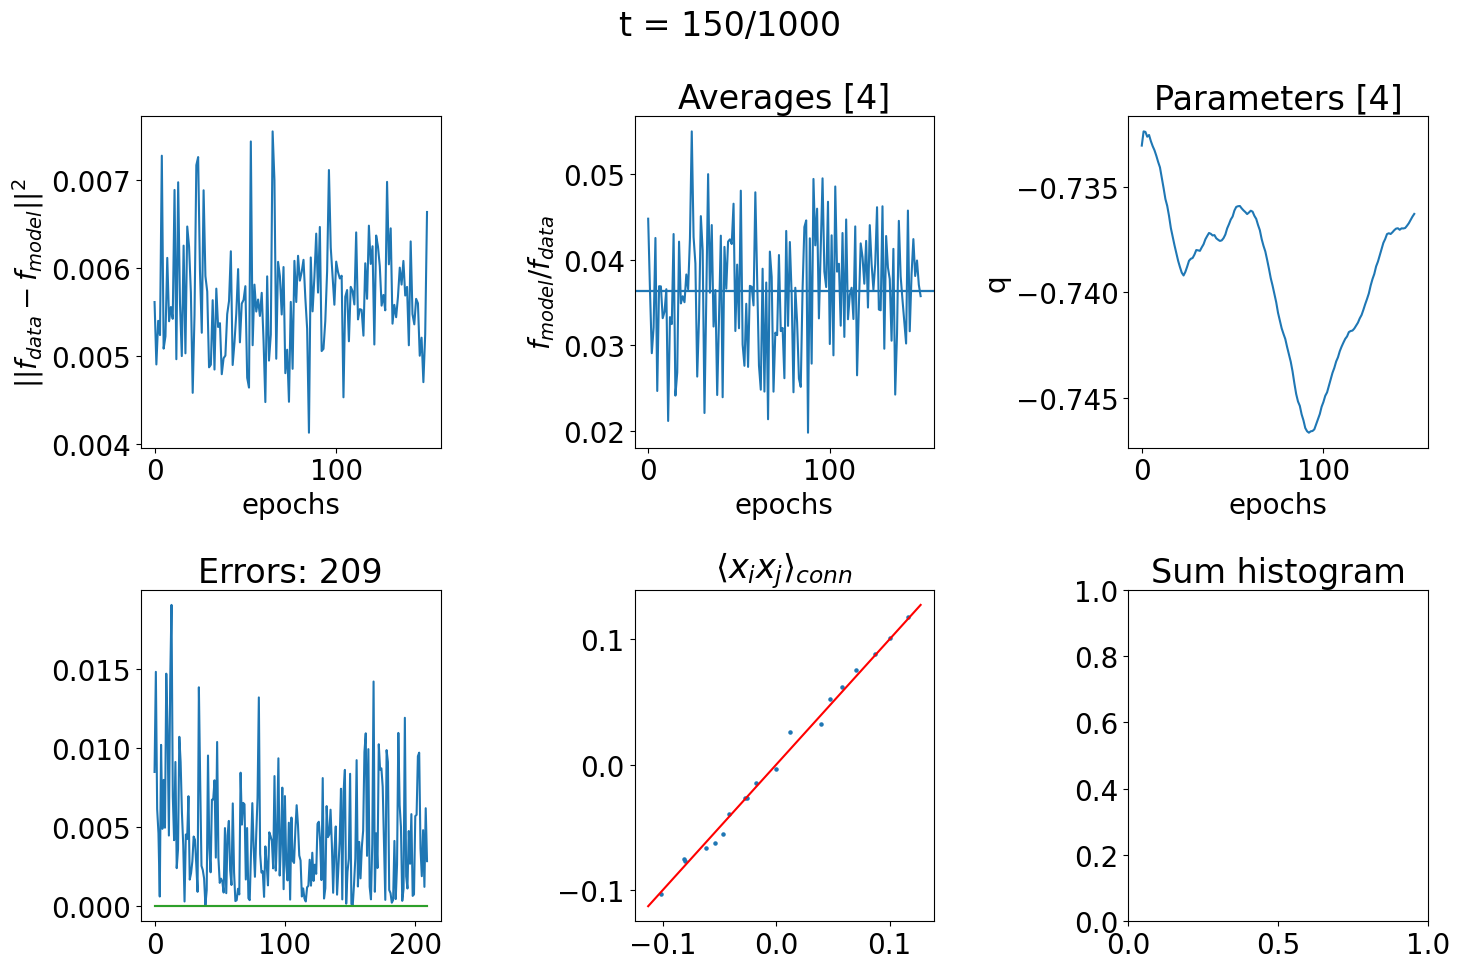

 20%|██        | 200/1000 [01:00<03:21,  3.98it/s]

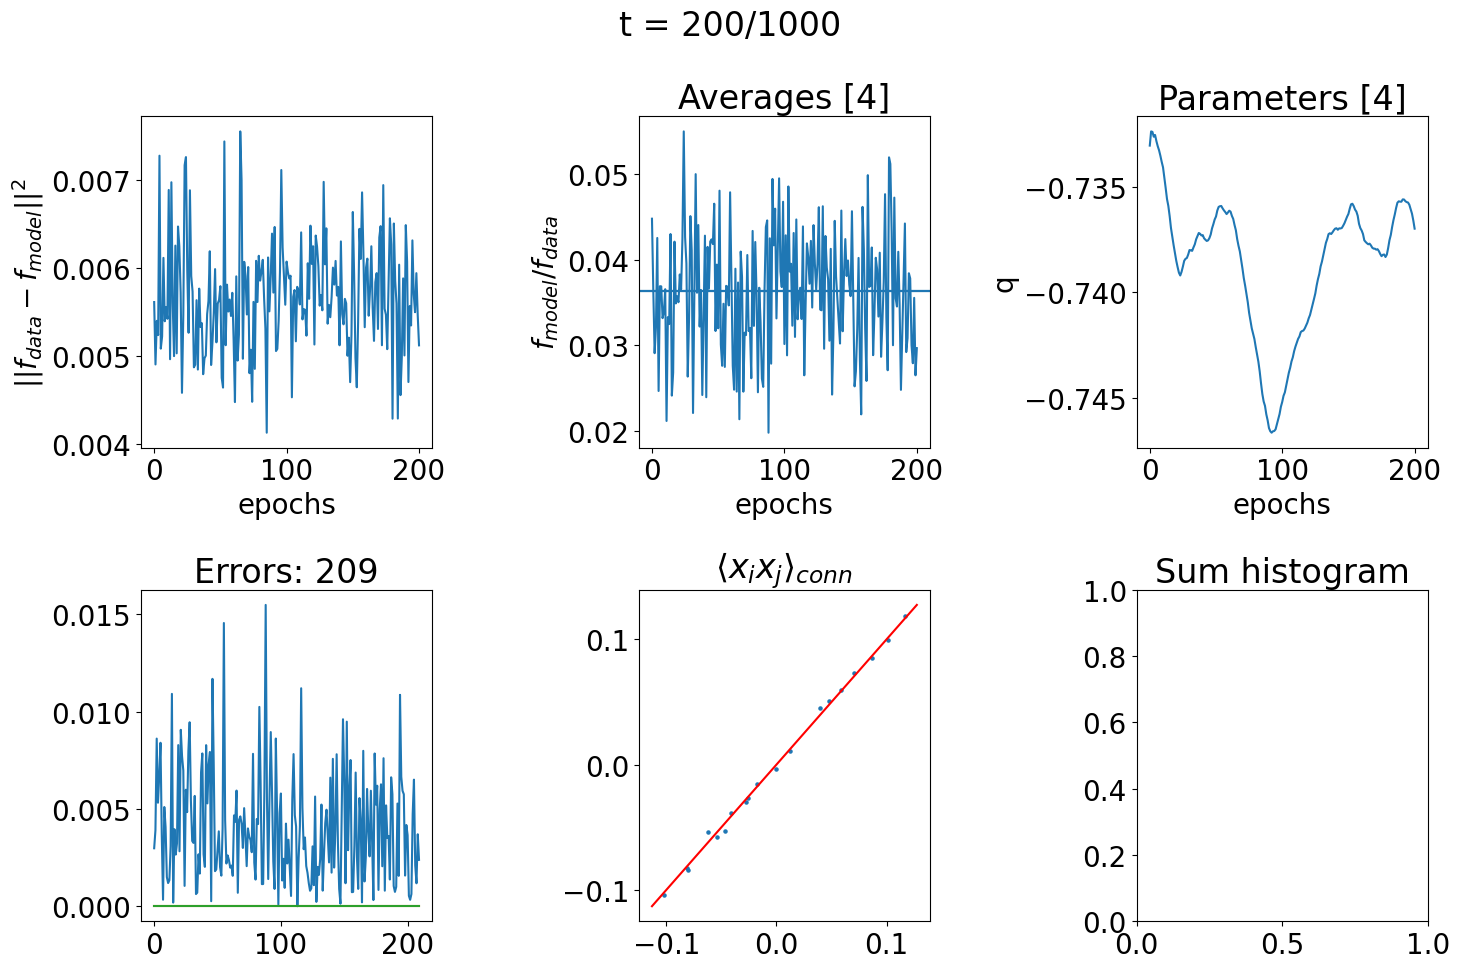

 25%|██▌       | 250/1000 [01:15<03:16,  3.81it/s]

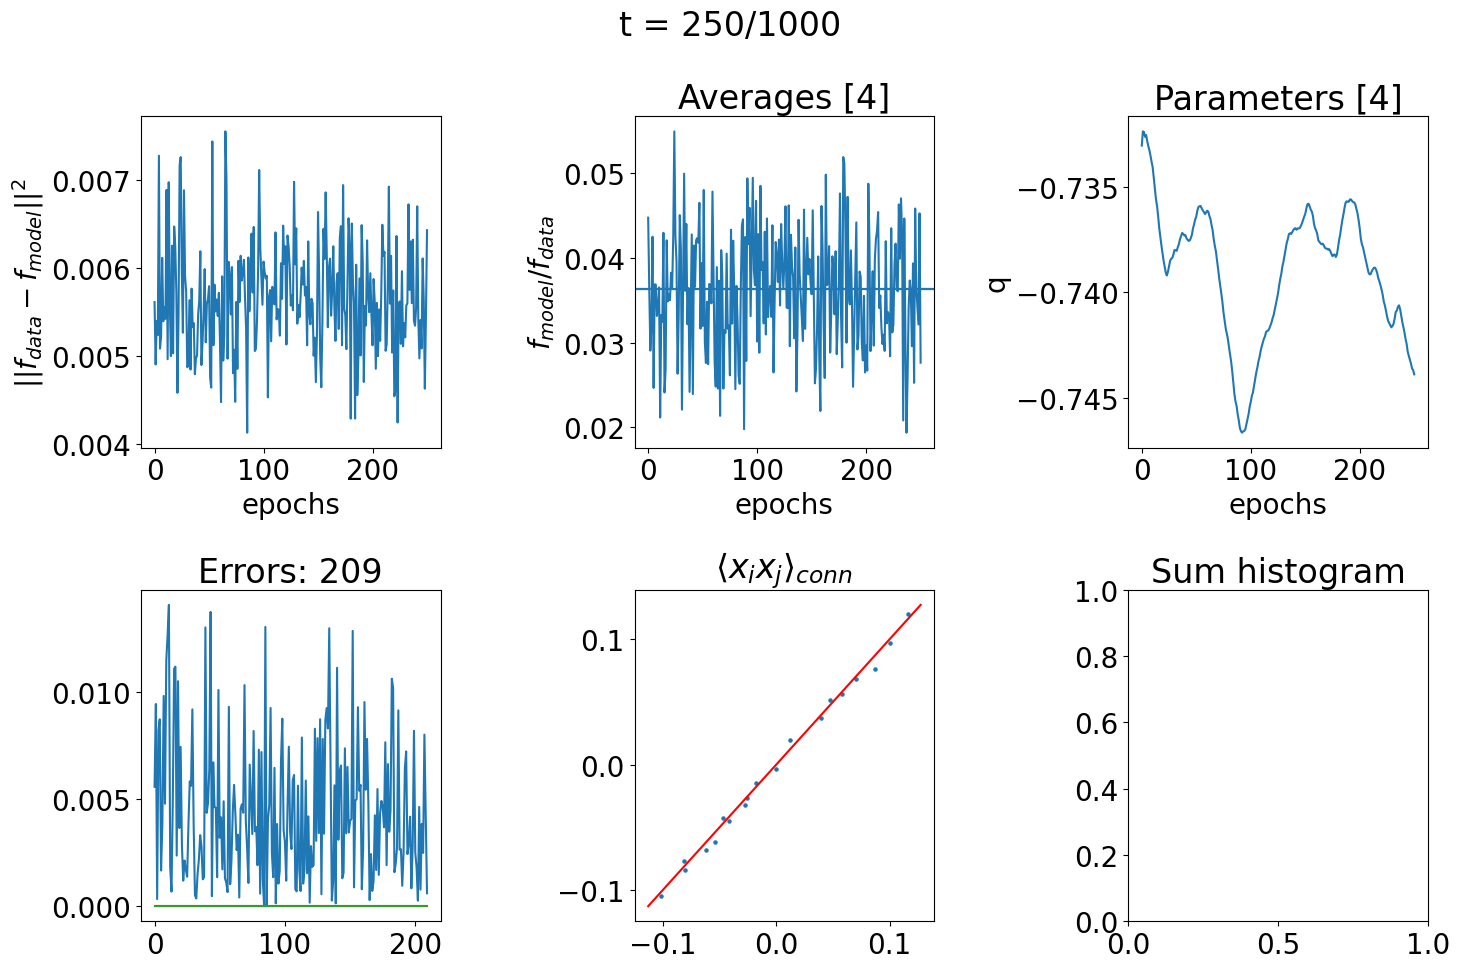

 30%|███       | 300/1000 [01:30<03:00,  3.88it/s]

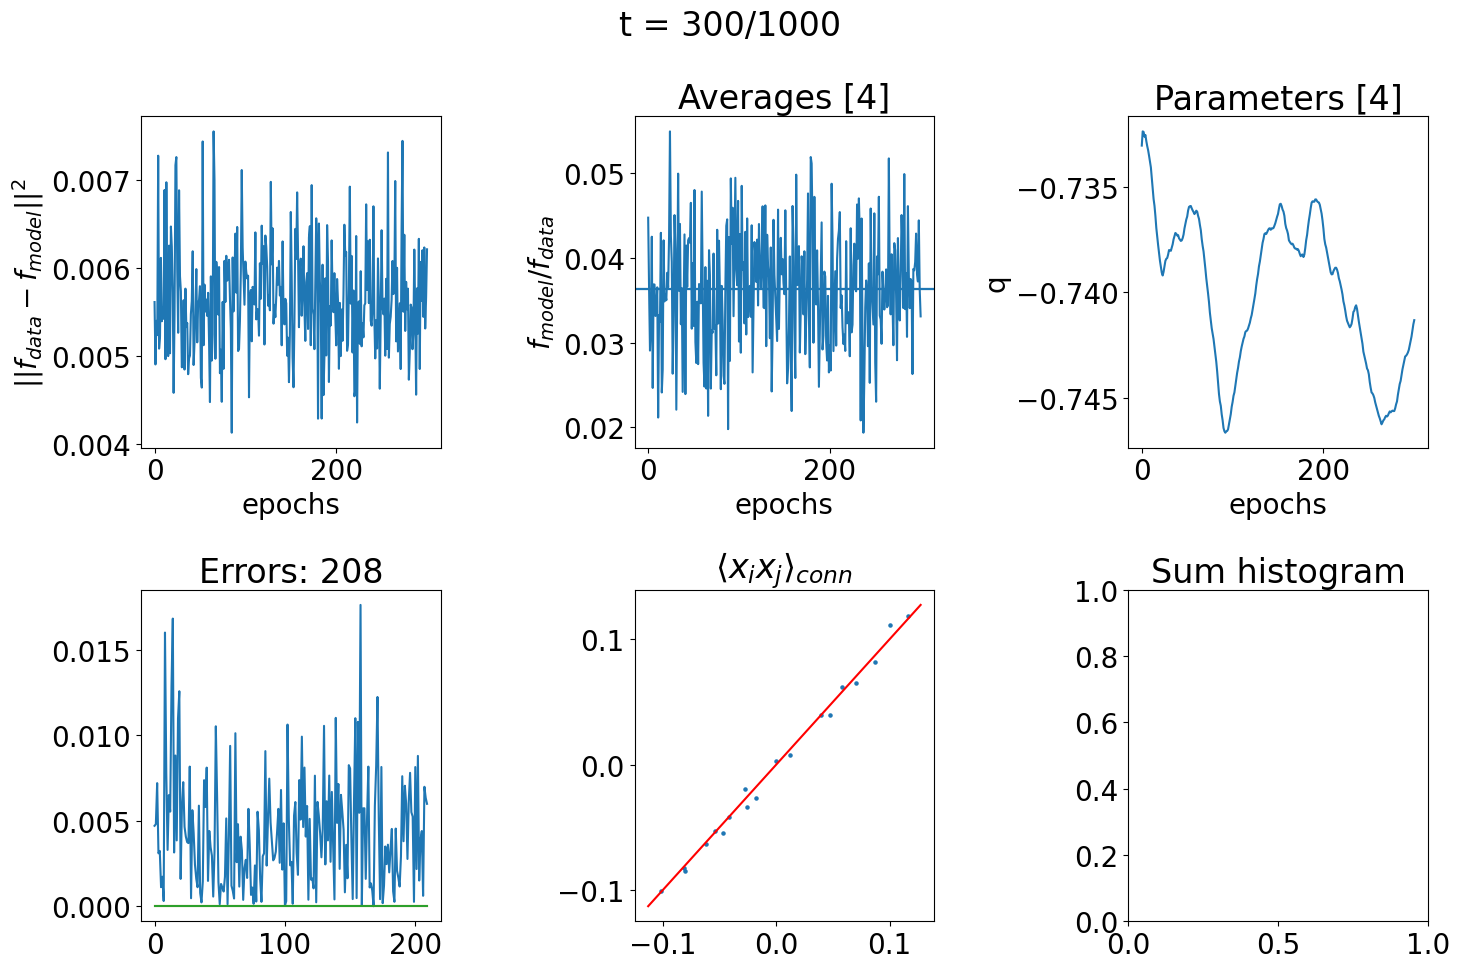

 35%|███▌      | 350/1000 [01:47<02:50,  3.81it/s]

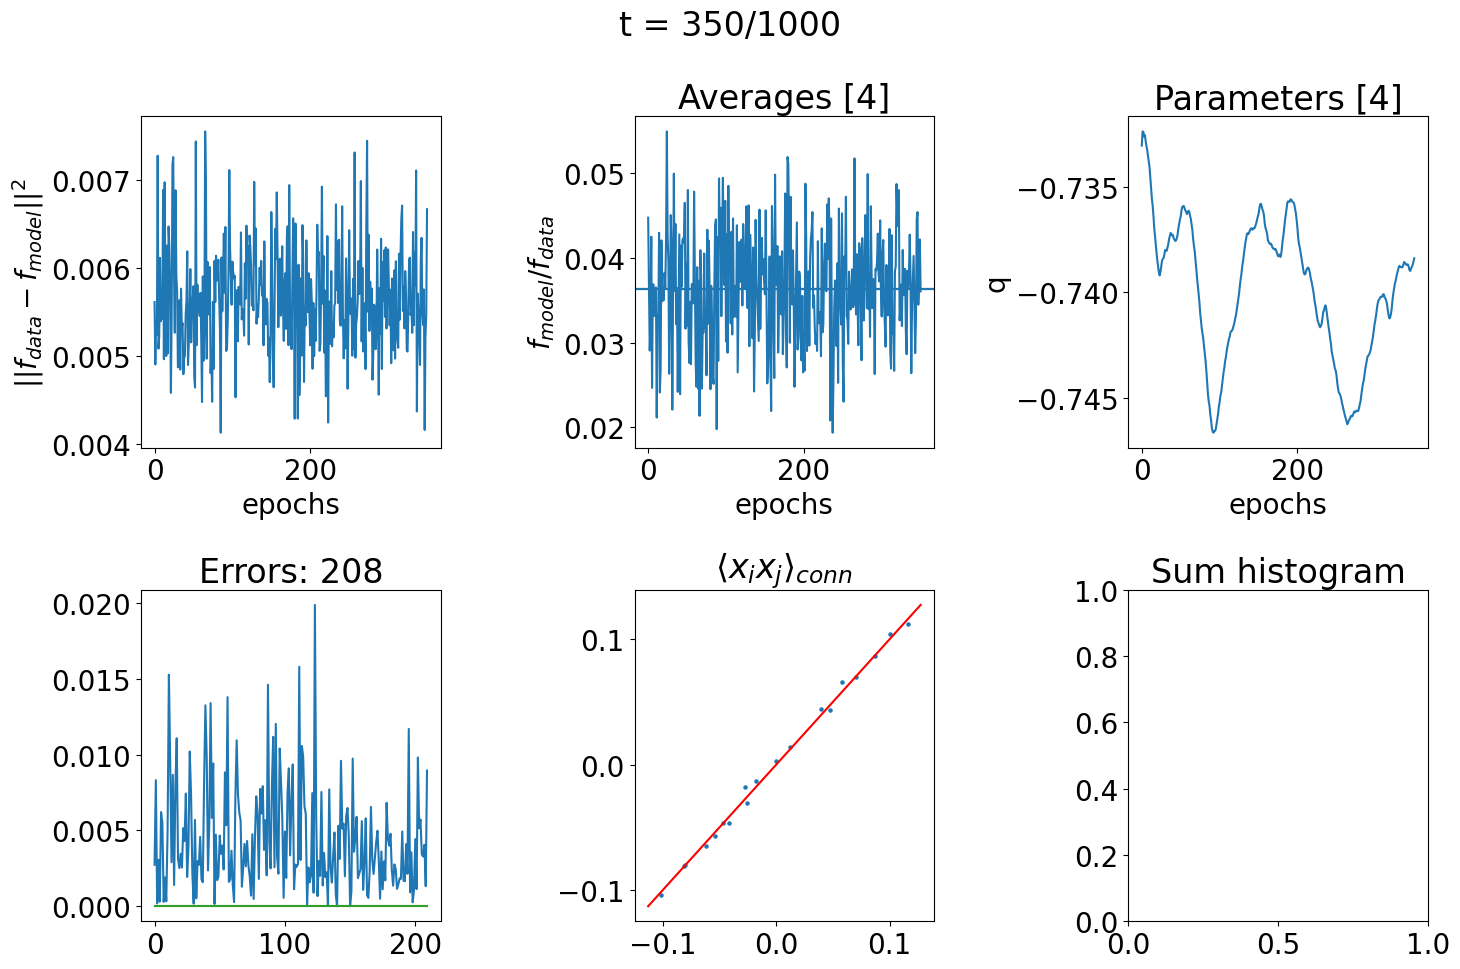

 40%|████      | 400/1000 [02:03<02:34,  3.88it/s]

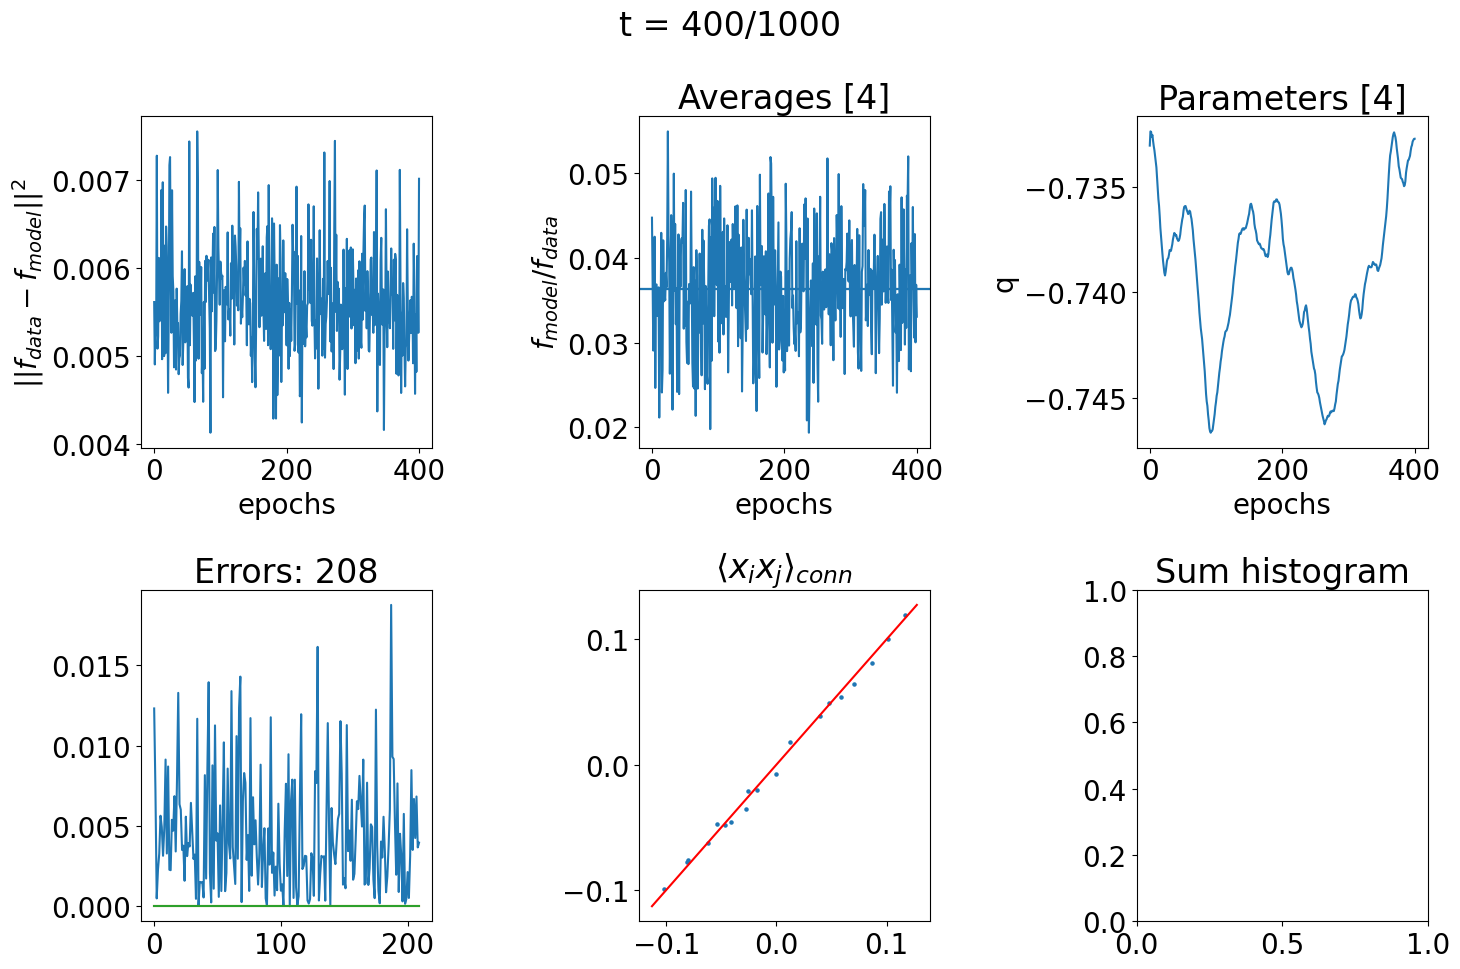

 45%|████▌     | 450/1000 [02:18<02:20,  3.91it/s]

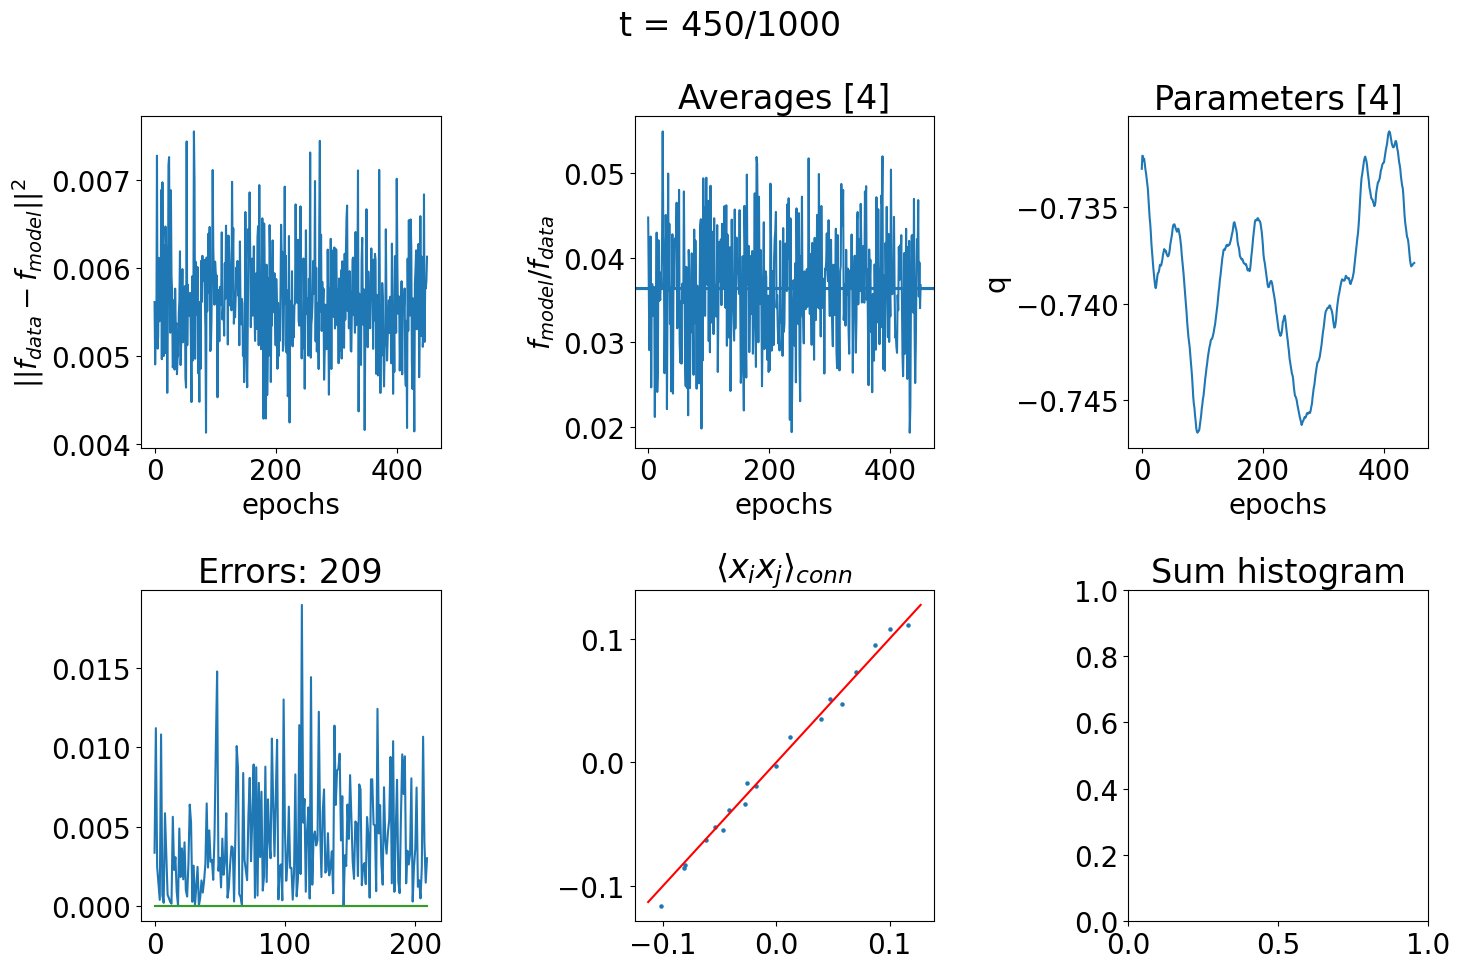

 50%|█████     | 500/1000 [02:32<02:08,  3.88it/s]

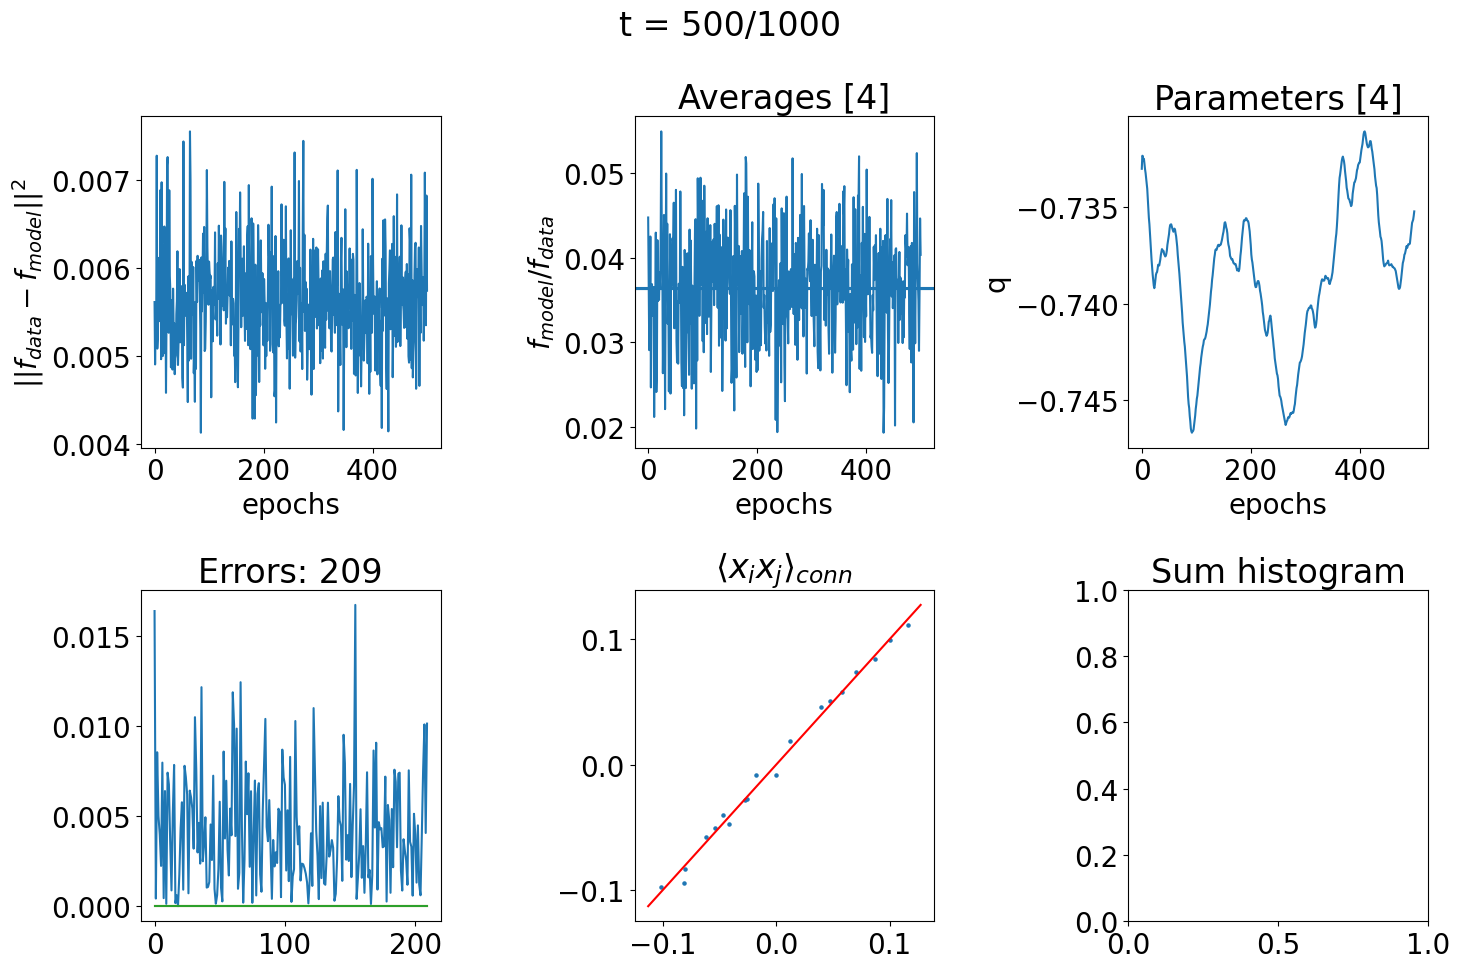

 55%|█████▌    | 550/1000 [02:47<01:52,  3.99it/s]

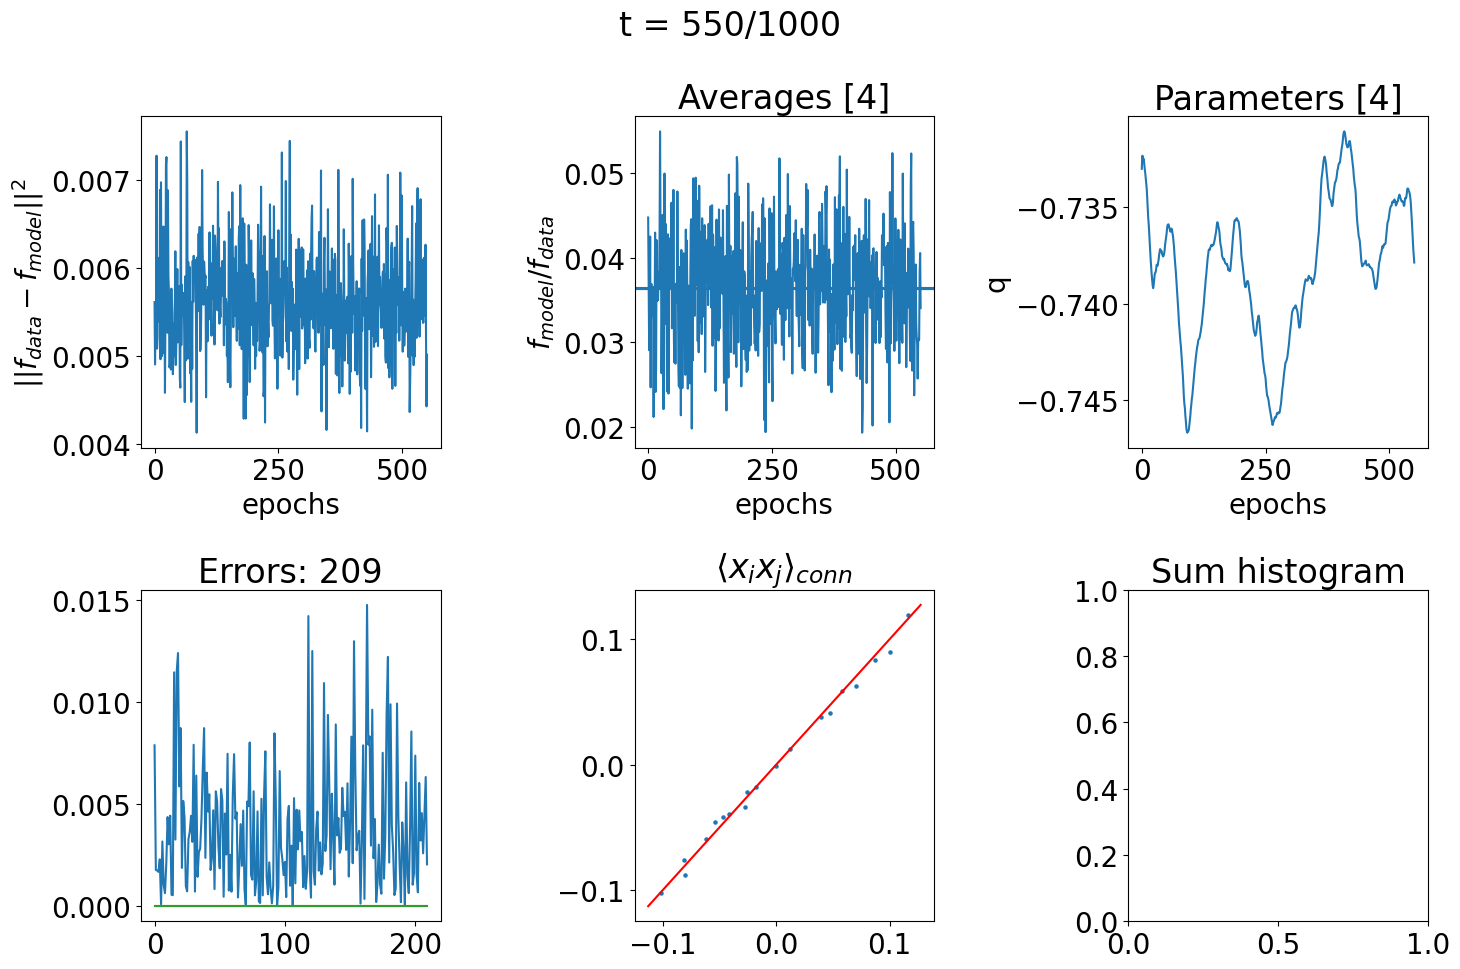

 60%|██████    | 600/1000 [03:01<01:31,  4.37it/s]

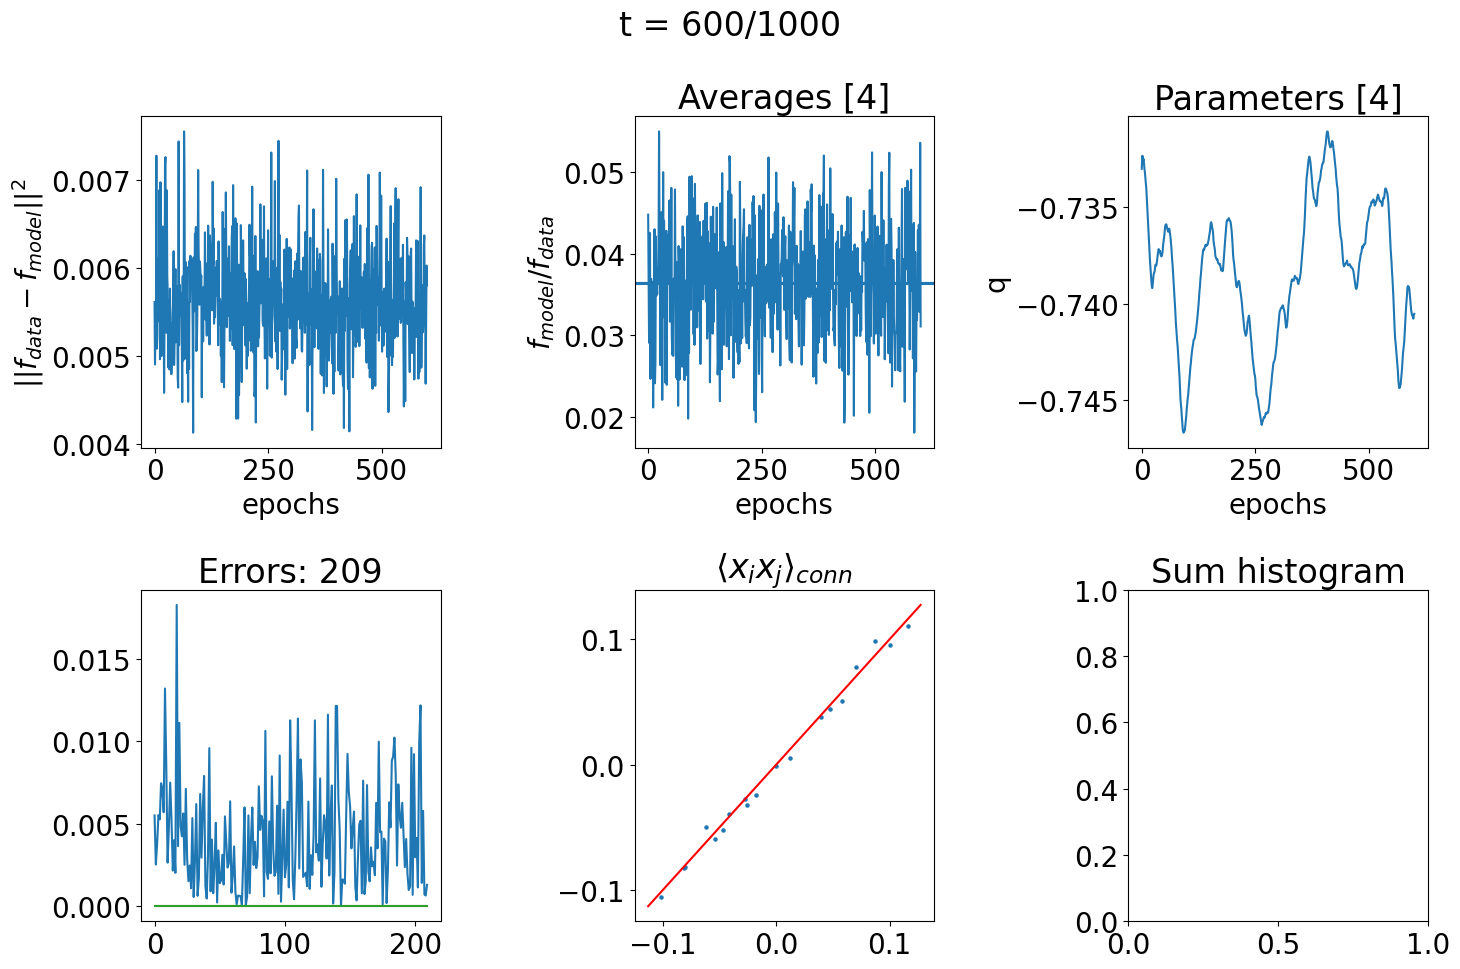

 65%|██████▌   | 650/1000 [03:15<01:17,  4.54it/s]

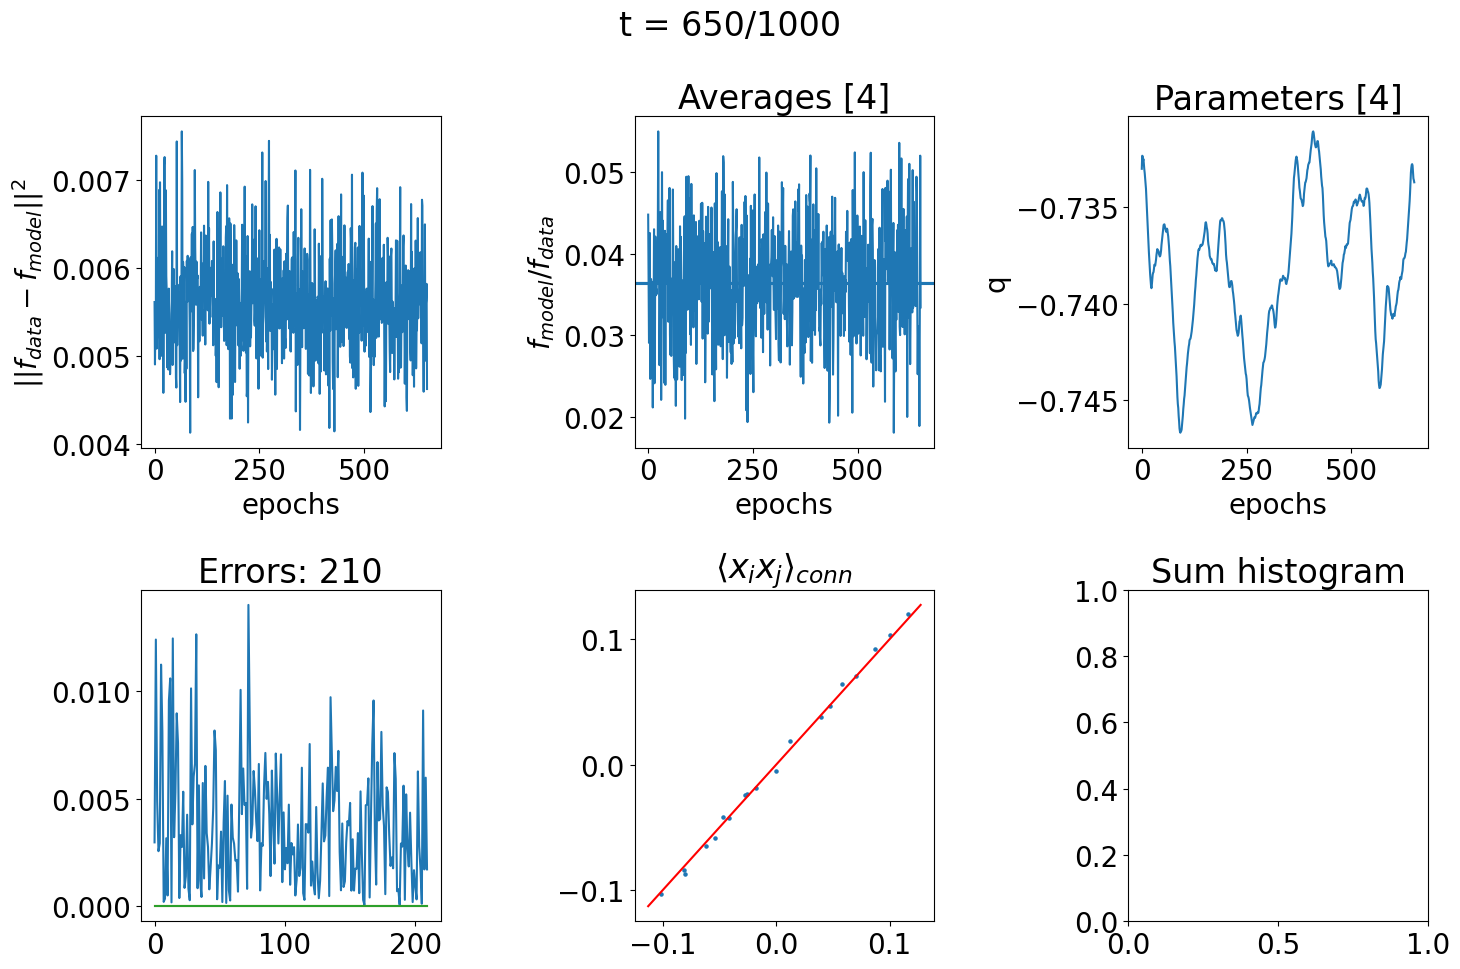

 70%|███████   | 700/1000 [03:28<01:06,  4.49it/s]

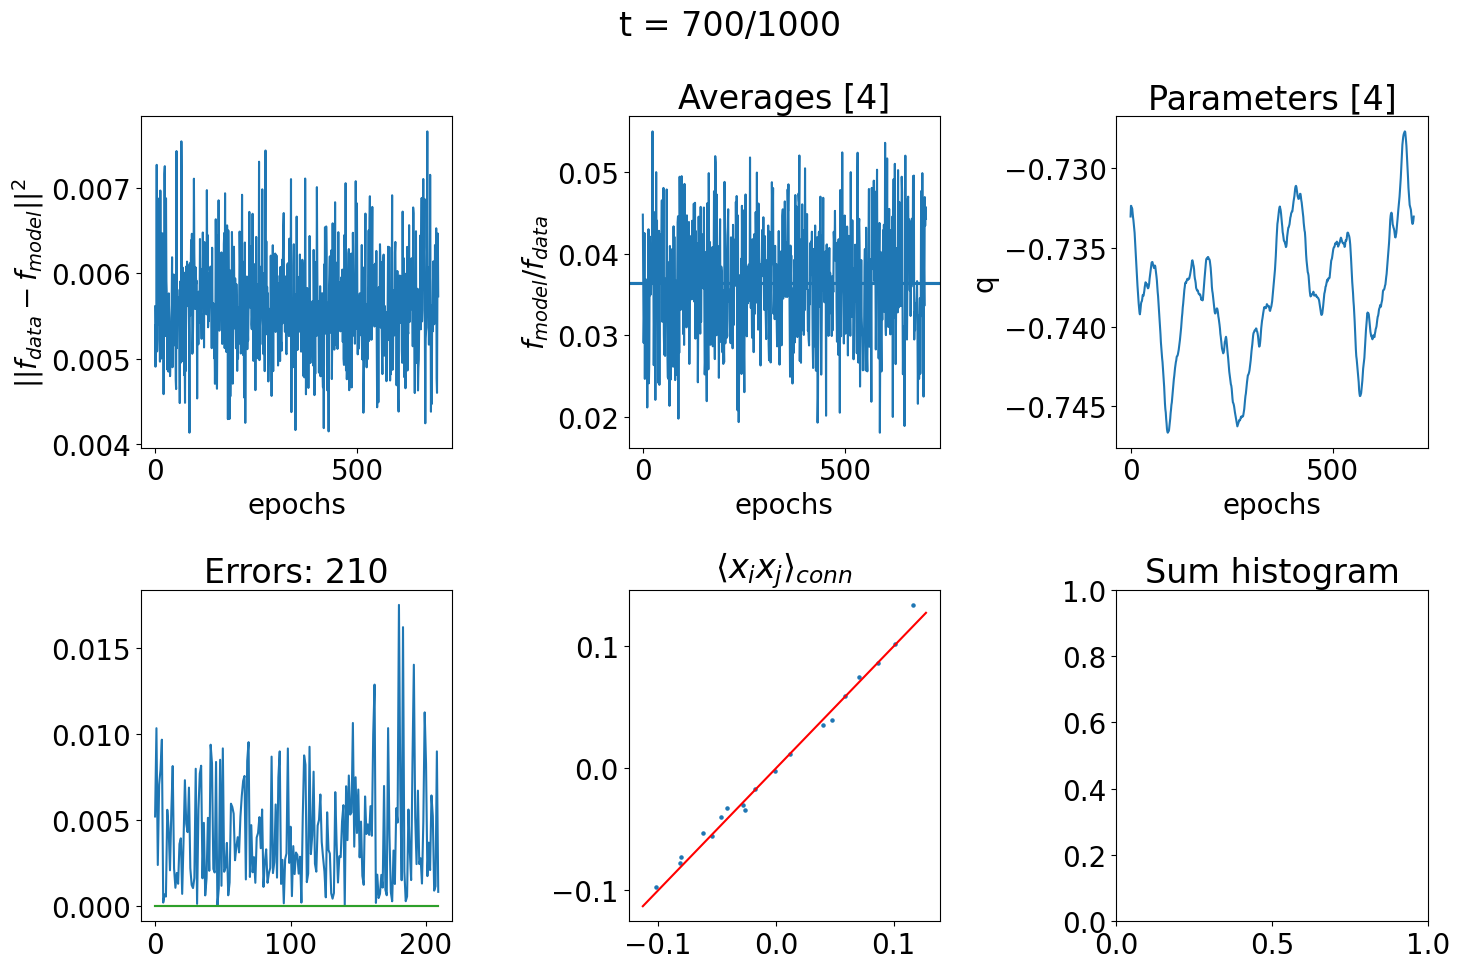

 75%|███████▌  | 750/1000 [03:41<00:55,  4.49it/s]

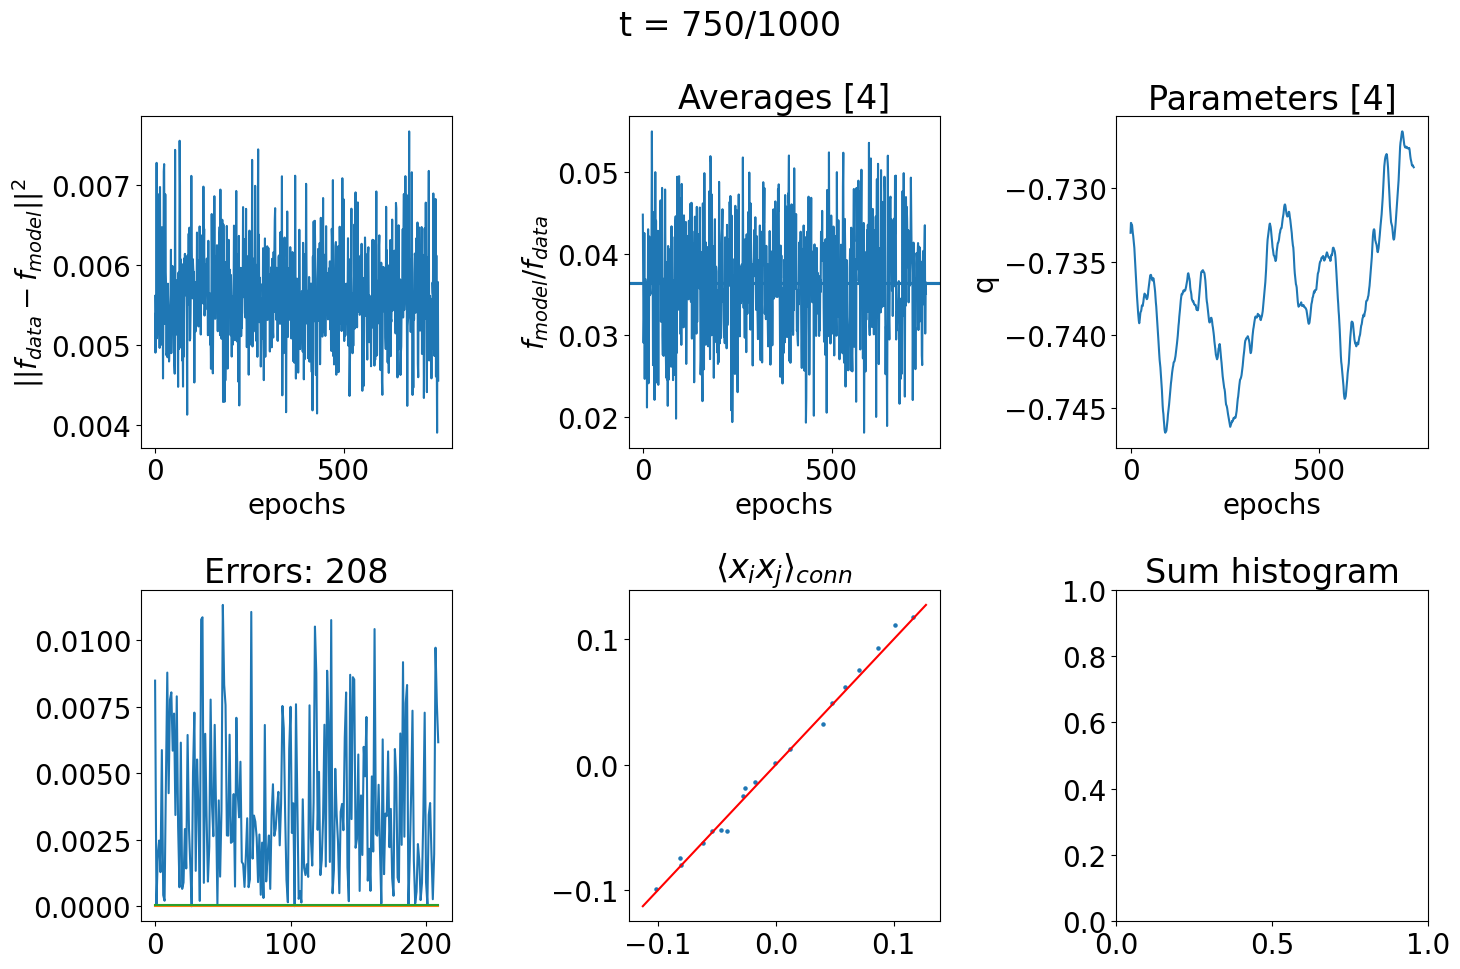

 80%|████████  | 800/1000 [03:54<00:41,  4.83it/s]

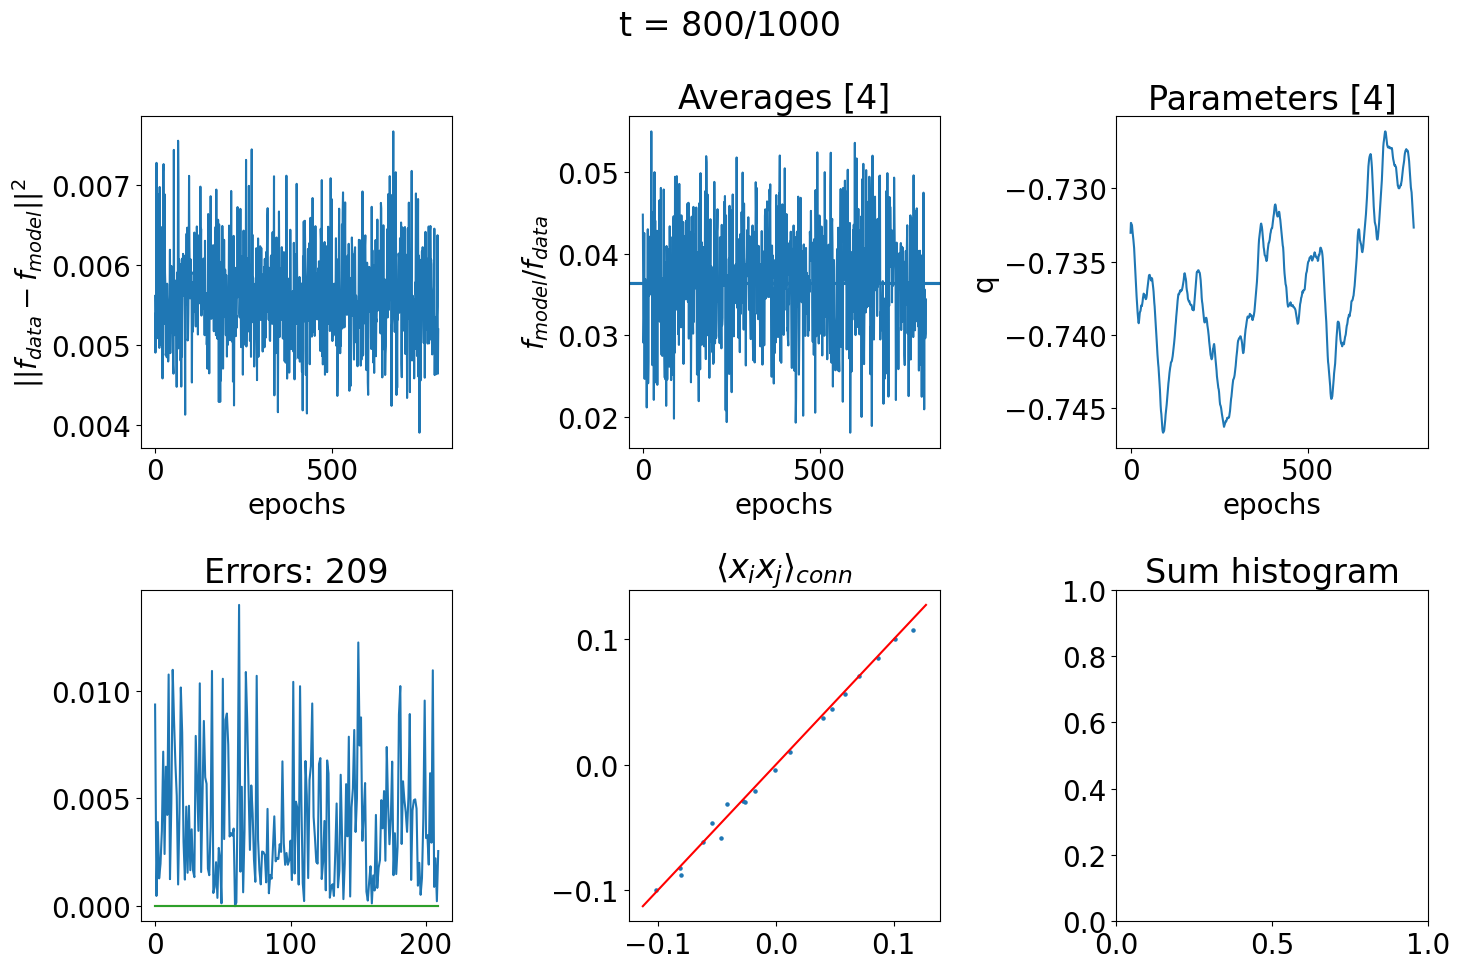

 85%|████████▌ | 850/1000 [04:08<00:34,  4.39it/s]

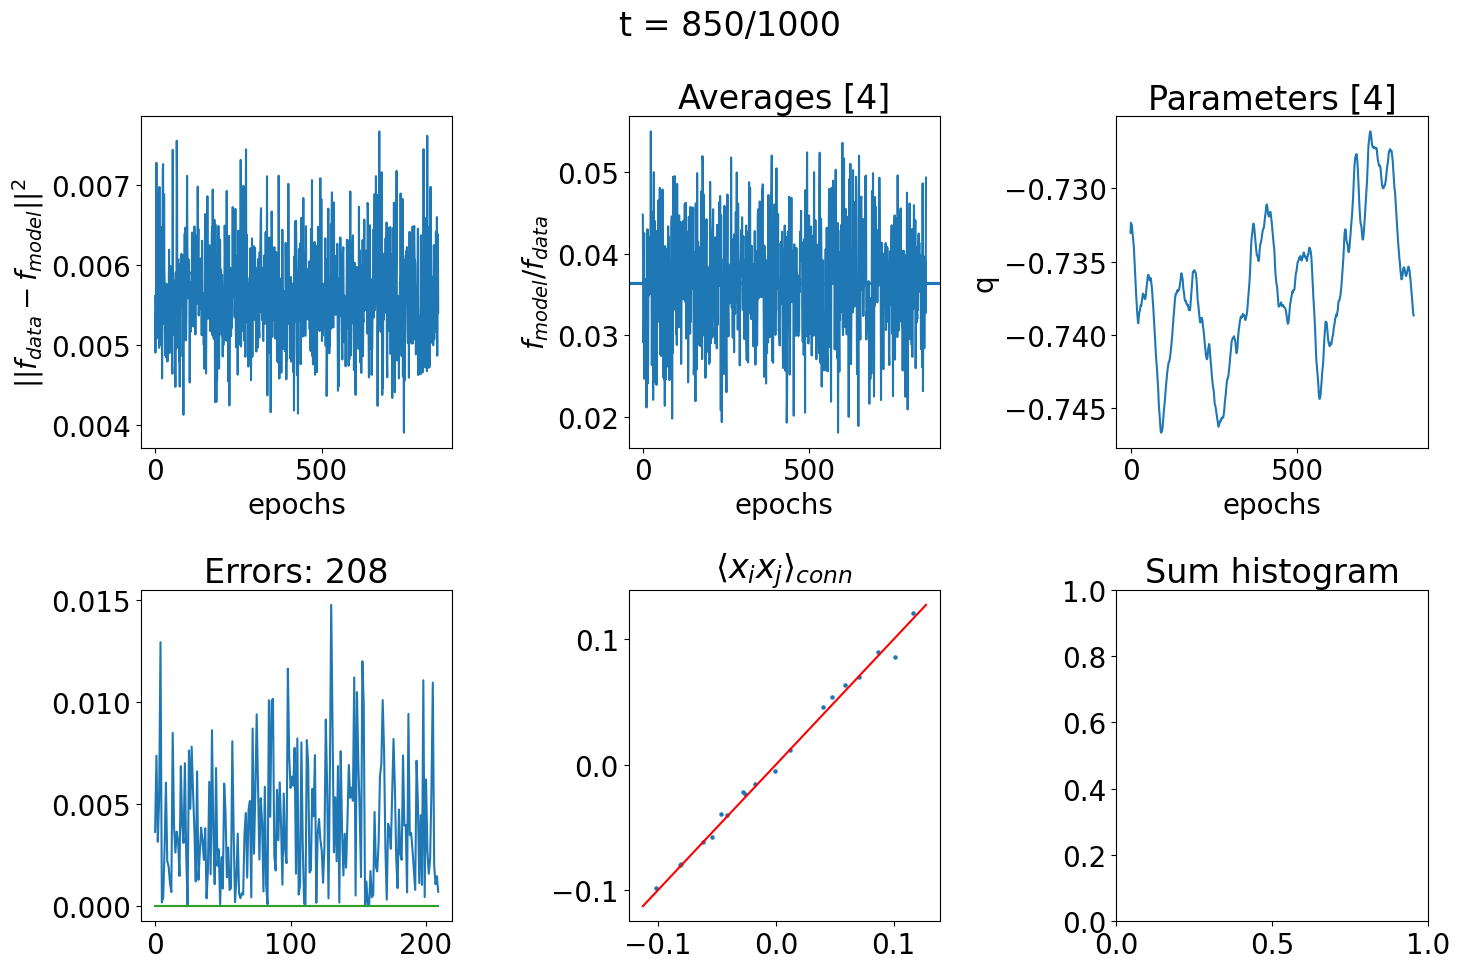

 90%|█████████ | 900/1000 [04:22<00:22,  4.38it/s]

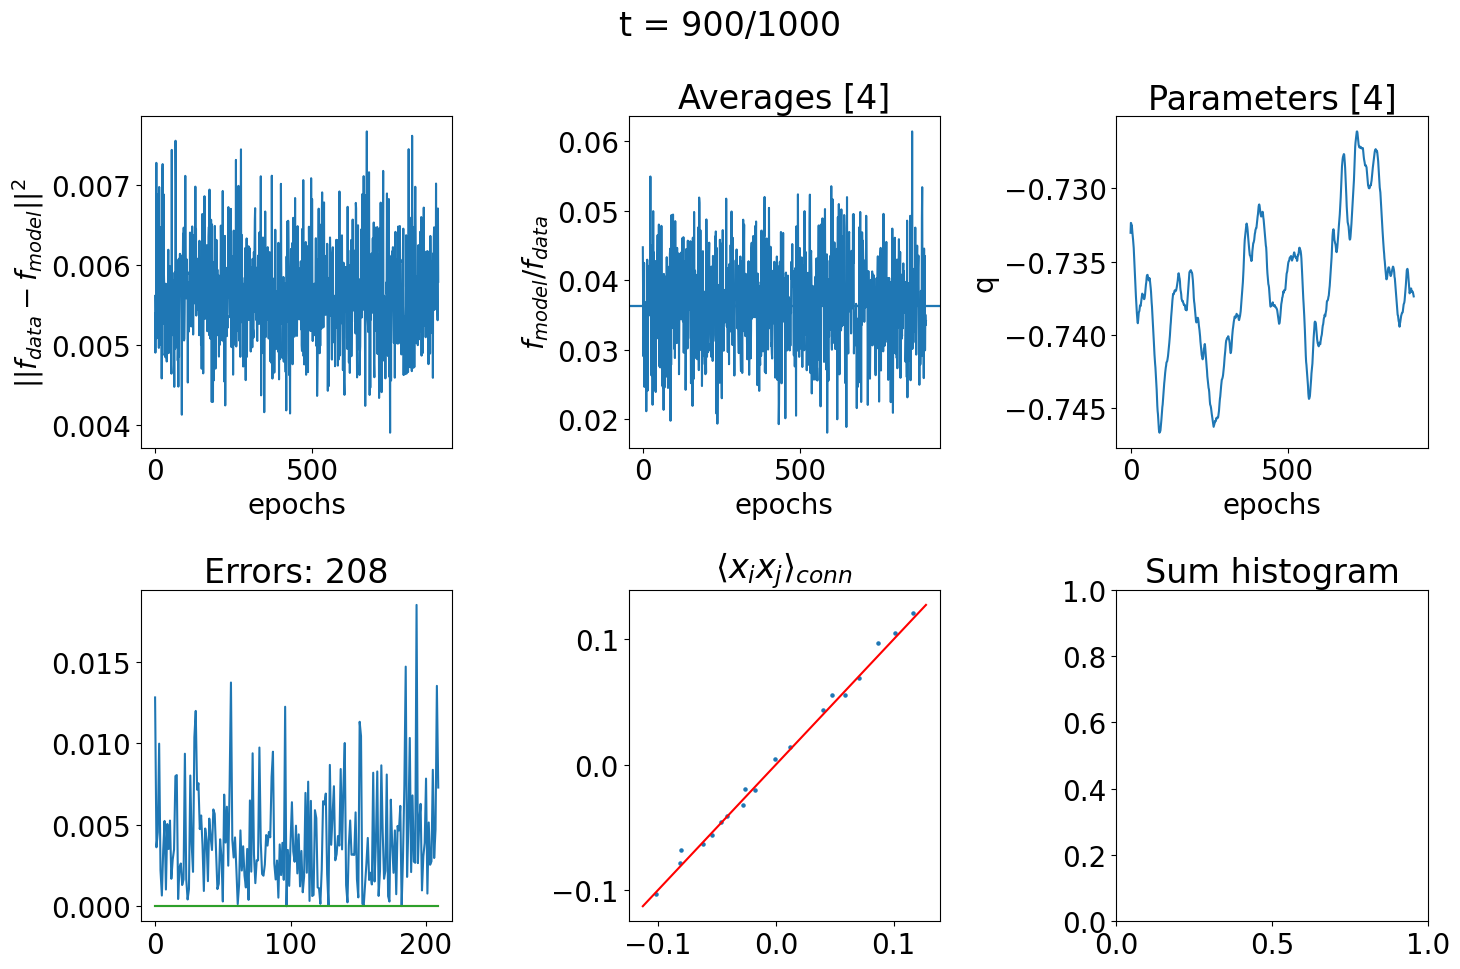

 95%|█████████▌| 950/1000 [04:35<00:11,  4.35it/s]

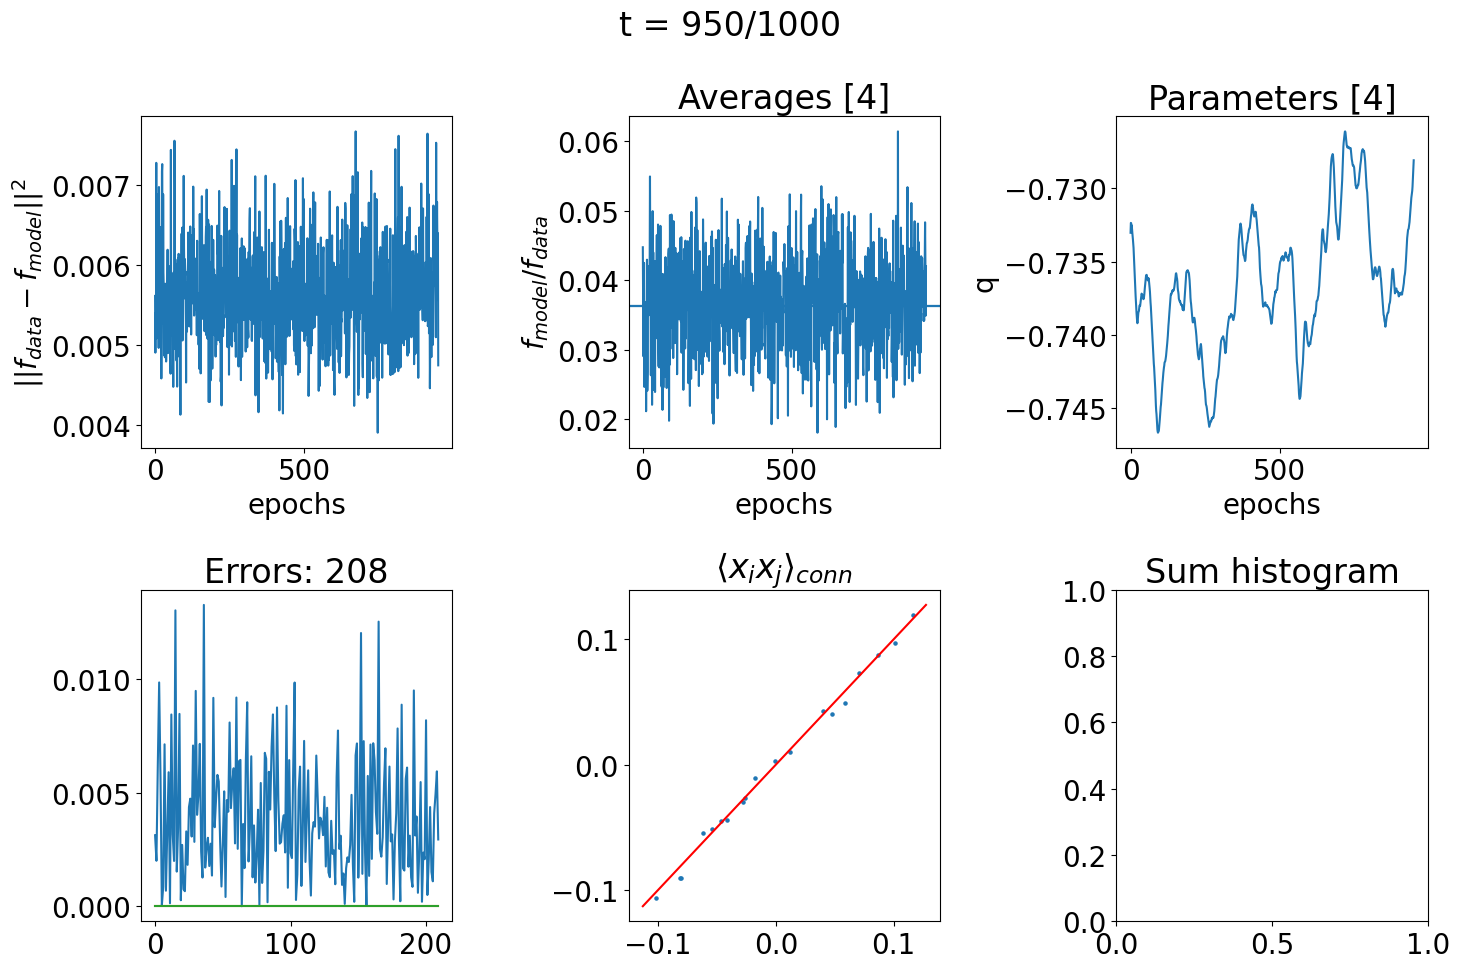

100%|██████████| 1000/1000 [04:50<00:00,  3.45it/s]


In [31]:
%run find_ising.py -d 20 -label a -n_thermalize 5000 -n_steps 1000 -adam_step 1e-3

# Step 2. Comparison

In this case we can compare the true values with the ones found. In real applications, one could compare higher moments, the distribution of the sum or other quantities not explicitly constrained.

In [26]:
q_found = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')

Text(0, 0.5, '$q_{found}$')

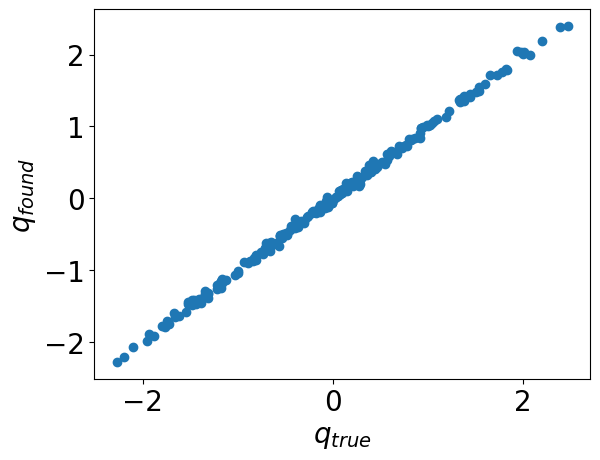

In [30]:
plt.scatter(q_true, q_found)
plt.xlabel(r'$q_{true}$')
plt.ylabel(r'$q_{found}$')